In [26]:
import imp
import numpy as np
import geopandas as gpd
import shapely.ops
import shapely.geometry
import pandas as pd
#import shapefile as shp
import matplotlib
import matplotlib.pyplot as plt
import os
import importlib
#imp.reload(AnalyzeLangs)
from AnalyzeLangs import find_perc, filter_perc_lang, find_dialects_perc, find_top_langs


#### 2001 Census districts with map geometry

In [2]:
mapPath = "C://Users/Owner/Desktop/Projects/Research/maps/Data/IndiaMaps/maps-master/Districts/"
df = gpd.read_file(mapPath + 'Census_2001/2001_Dist.shp')

#shf = shp.Reader(datapath + 'Census_2001/2001_Dist.shp')
display(df.head())
display(df.shape)

,ST_NM,ST_CEN_CD,DT_CEN_CD,DISTRICT,geometry
0,Gujarat,24,15,Anand,"MULTIPOLYGON (((72.62987 22.81814, 72.63297 22..."
1,Andhra Pradesh,28,22,Anantapur,"POLYGON ((78.14427 14.94530, 78.14382 14.94009..."
2,Jammu and Kashmir,01,06,Anantnag,"POLYGON ((75.63102 34.22268, 75.63737 34.22115..."
3,Orissa,21,15,Anugul,"POLYGON ((85.39504 21.18471, 85.39504 21.18471..."
4,Bihar,10,07,Araria,"POLYGON ((87.64834 26.39293, 87.64932 26.39037..."


(594, 5)

### 2001 Language Data

In [3]:
DataPath = "C://Users/Owner/Desktop/Projects/Research/maps/Data/CleanData/"

#d11 = pd.read_pickle(DataPath + "LangData2011.pkl")
d01 = pd.read_pickle(DataPath + "LangData2001.pkl")

In [4]:
d01[d01["District"]>0].head()

,State,District,Tehsil,AreaName,LangGroup,LangGroupCode,LangName,LangCode,Total,Rural,Urban,StateName,DistrictName
303,1,1,0,Kupwara_Jammu&Kashmir,Assamese,1000.0,Assamese,1002,386,337,49,Jammu&Kashmir,Kupwara_Jammu&Kashmir
304,1,1,0,Kupwara_Jammu&Kashmir,Assamese,1000.0,Assamese_Other,1999,15,15,0,Jammu&Kashmir,Kupwara_Jammu&Kashmir
306,1,1,0,Kupwara_Jammu&Kashmir,Bengali,2000.0,Bengali,2004,602,466,136,Jammu&Kashmir,Kupwara_Jammu&Kashmir
308,1,1,0,Kupwara_Jammu&Kashmir,Bodo,3000.0,Bodo/Boro,3001,17,11,6,Jammu&Kashmir,Kupwara_Jammu&Kashmir
309,1,1,0,Kupwara_Jammu&Kashmir,Bodo,3000.0,Bodo/Boro_Other,3999,6,6,0,Jammu&Kashmir,Kupwara_Jammu&Kashmir


### Match the State Names in the two tables

In [5]:
States_cen = d01["StateName"].unique().tolist()
States_map = df["ST_NM"].unique().tolist()
States_cen.sort()
States_map.sort()
print(States_cen, States_map)
print(len(States_cen), len(States_map))

['Andaman&NicobarIslands', 'AndhraPradesh', 'ArunachalPradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra&NagarHaveli', 'Daman&Diu', 'Goa', 'Gujarat', 'Haryana', 'HimachalPradesh', 'Jammu&Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'MadhyaPradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'NctOfDelhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Tripura', 'UttarPradesh', 'Uttarakhand', 'WestBengal'] ['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 'Delhi  & NCR', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
35 35


In [6]:
data_names = ['Andaman&NicobarIslands' ,'AndhraPradesh', 'ArunachalPradesh', 'Assam',
 'Bihar', 'Chandigarh' ,'Chhattisgarh' ,'Dadra&NagarHaveli', 'Daman&Diu', 'Goa',
 'Gujarat' ,'Haryana' ,'HimachalPradesh', 'Jammu&Kashmir' ,'Jharkhand',
 'Karnataka' ,'Kerala', 'Lakshadweep', 'MadhyaPradesh', 'Maharashtra',
 'Manipur', 'Meghalaya' ,'Mizoram' ,'Nagaland' ,'NctOfDelhi', 'Odisha',
 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Tripura',
 'UttarPradesh', 'Uttarakhand', 'WestBengal']
map_names =['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunanchal Pradesh', 'Assam', 
            'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu', 
            'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 
            'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 
            'Delhi  & NCR', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
            'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
for i in range(len(data_names)):
    df.loc[df["ST_NM"]==map_names[i], "ST_NM"] = data_names[i]

#### Update distrct names to match data

In [7]:
data_names = ['Puducherry', 'Senapati(ExclSub-Divisions)', 'Nan', 'Ri-Bhoi',
       'Bulandshahar', 'Maharajganj']
map_names = [ 'Pondicherry', 'Senapati(Excl.3sub-divisions)', 'DataNotAvailable'
             , 'RiBhoi', 'Bulandshahr', 'Mahrajganj']
for i in range(len(data_names)):
    df.loc[df["DISTRICT"]==map_names[i], "DISTRICT"] = data_names[i]

In [8]:
df["DISTRICT"] = df['DISTRICT'].str.replace(' ', '')
df["DistrictName"] = df["DISTRICT"]+"_" +df["ST_NM"]

In [9]:
Dmap = df["DistrictName"].unique().tolist()
Dtab = d01["DistrictName"].unique().tolist()
print([d for d in Dmap if d not in Dtab])
print([d for d in Dtab if d not in Dmap])

['DataNotAvailable_Jammu&Kashmir', 'Senapati(Excl.3sub-divisions)_Manipur', 'RiBhoi_Meghalaya']
['Jammu&Kashmir_Jammu&Kashmir', 'HimachalPradesh_HimachalPradesh', 'Punjab_Punjab', 'Uttarakhand_Uttarakhand', 'Haryana_Haryana', 'NctOfDelhi_NctOfDelhi', 'Rajasthan_Rajasthan', 'UttarPradesh_UttarPradesh', 'Bihar_Bihar', 'Sikkim_Sikkim', 'ArunachalPradesh_ArunachalPradesh', 'Nagaland_Nagaland', 'Manipur_Manipur', 'Mizoram_Mizoram', 'Tripura_Tripura', 'Meghalaya_Meghalaya', 'Assam_Assam', 'WestBengal_WestBengal', 'Jharkhand_Jharkhand', 'Odisha_Odisha', 'Chhattisgarh_Chhattisgarh', 'MadhyaPradesh_MadhyaPradesh', 'Gujarat_Gujarat', 'Daman&Diu_Daman&Diu', 'Maharashtra_Maharashtra', 'AndhraPradesh_AndhraPradesh', 'Karnataka_Karnataka', 'Goa_Goa', 'Kerala_Kerala', 'TamilNadu_TamilNadu', 'Andaman&NicobarIslands_Andaman&NicobarIslands', 'Senapati(ExclSub-Divisions)_Manipur', 'Nan_Tripura', 'Nan_WestBengal', 'Nan_Puducherry', 'Nan_Karnataka', 'Nan_TamilNadu', 'Nan_Nagaland', 'Ri-Bhoi_Meghalaya', 'Na

#### Calculate % speakers for different dialects & languages

In [10]:
d01_ = find_perc(d01)
df_01 = d01_[d01_["District"]!=0]
#df_01["DISTRICT_01"] = df_01["DistrictName"]
df_01.shape
#d01_districts = d01[d01["Area Name"]==]

(38299, 25)

In [15]:
df_test = filter_perc_lang(df_01, "LangName", "Bengali", "District")

In [17]:
df.head()

,ST_NM,ST_CEN_CD,DT_CEN_CD,DISTRICT,geometry,DistrictName
0,Gujarat,24,15,Anand,"MULTIPOLYGON (((72.62987 22.81814, 72.63297 22...",Anand_Gujarat
1,AndhraPradesh,28,22,Anantapur,"POLYGON ((78.14427 14.94530, 78.14382 14.94009...",Anantapur_AndhraPradesh
2,Jammu&Kashmir,01,06,Anantnag,"POLYGON ((75.63102 34.22268, 75.63737 34.22115...",Anantnag_Jammu&Kashmir
3,Odisha,21,15,Anugul,"POLYGON ((85.39504 21.18471, 85.39504 21.18471...",Anugul_Odisha
4,Bihar,10,07,Araria,"POLYGON ((87.64834 26.39293, 87.64932 26.39037...",Araria_Bihar


In [28]:
df_test = df_test[~np.isnan(df_test["State"])]

#### Filter data by language/ dialect and merge, then show prevalence of language/ dialect

In [31]:
def plot_lang_map(lang_name, 
                  lang_type="LangName", 
                  colorscheme ="Blues", 
                  State = "India", 
                  showStates = False,
                 outline = False):
    
    #lang_name = str(lang_name)
    df_test = filter_perc_lang(df_01, lang_type, lang_name, "District")
    df_test = df_test[~np.isnan(df_test["State"])]
    #df_test["DISTRICT"] = df_test["DistrictName"]
    df_plot = df.merge(df_test, on = "DistrictName", how = "outer")
    #display(df_plot.shape)
    #df_test.head()

    fig, ax = plt.subplots(figsize = (10,10))
    
    if (State == "India"):
        
        ax.set_title("Percentage distribution of "+str(lang_name)+" speakers, 2001")  
        df_plot.plot(column = 'Total_%', ax=ax, cmap = colorscheme,
                        legend = True, legend_kwds={'shrink': 0.3}, 
                        markersize = 10)
    
        if (showStates): 
        #darkest = matplotlib.colors.ListedColormap(colorscheme[10:,:-1])
            States = df_plot["ST_NM"].unique().tolist()
            for s in States:
                ls = shapely.ops.unary_union(df_plot["geometry"][df_plot["ST_NM"]==s]).boundary
                gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)

        if (outline):
            ls = shapely.ops.unary_union(df_plot["geometry"]).boundary
            gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)
            
    
    else:
        df_plot = df_plot[df_plot["ST_NM"]==State]  
        df_plot.plot(column = 'Total_%', ax=ax, cmap = colorscheme,
                        legend = True, legend_kwds={'shrink': 0.3}, 
                        markersize = 10)
        df_plot.boundary.plot(edgecolor="black", lw=0.5, linestyle = '--', ax=ax)
        ax.set_title("Percentage distribution of "+str(lang_name)+" speakers in " + State + ", 2001")

C:\Users\Owner\anaconda3\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


CPU times: total: 281 ms
Wall time: 310 ms


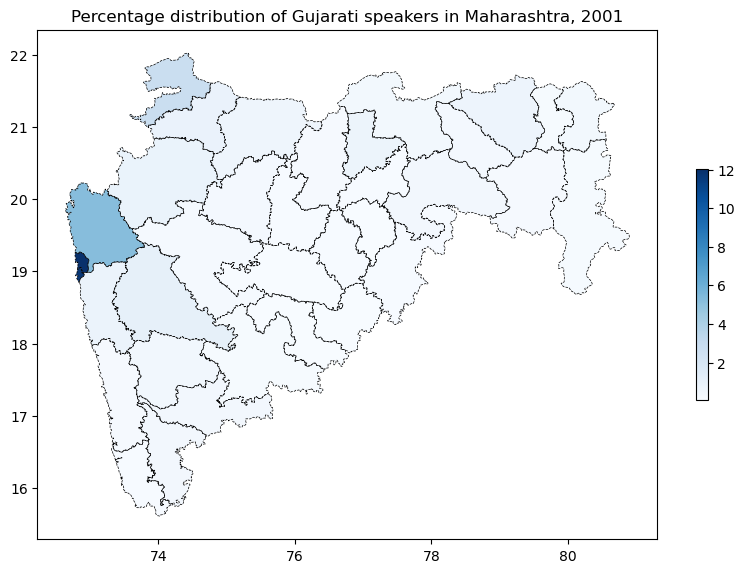

In [32]:
%%time
plot_lang_map("Gujarati", 
              colorscheme = "Blues", 
              lang_type = "LangName", 
              State = "Maharashtra", 
              showStates = False,
             outline = True
             )

#### Plot highest, second highest/ third highest language in any district...

In [34]:
def find_top_langs(df, lang_type, rank):
    import warnings
    warnings.filterwarnings("ignore")
    pv = df[["AreaName", lang_type, lang_type + "_Total_%"]].pivot_table(index = "AreaName", 
                                                                      columns = lang_type, 
                                                                     values =  lang_type +"_Total_%")
    pv = pv.rename_axis(None, axis=0)  
    #pv = pv.rename_axis(None, axis=1)  
    pv.columns.name = None
    pv.index.name =None
    pv = pv.fillna(0)
    pv.head()
    pv = pv.rank(ascending=False, method='first', axis=1)
    pv = pv.reset_index().melt(id_vars='index')

    pv1 = pv[pv['value'] == rank]
    pd.DataFrame ( pv1.groupby('index')['variable'].apply(list).reset_index())
    pv1["rank_"+str(rank)] = pv1["variable"]

    return pv1

In [35]:
d=find_top_langs(df_01, "LangName", 1)

In [36]:
d["rank_1"].nunique()

85

In [79]:
def plot_mode_map(lang_type="LangName", 
                  rank = 1, 
                  State = "India", 
                  showStates = False,
                  outline = False,
                 showLegend = False):
    
    #lang_name = str(lang_name)
    df_test = find_top_langs(df_01, lang_type, rank)
    df_test["DistrictName"] = df_test["index"]
    df_plot = df.merge(df_test, on = "DistrictName", how = "outer")
    
    if rank==1:
        modeTitle = "Most spoken languages by district "
        
    if rank==2:
        modeTitle = "2nd most spoken languages by district "
        
    if rank==3:
        modeTitle = "3rd most spoken languages by district "
        
    if rank>3:
        modeTitle = str(rank)+"th most spoken languages by district "

    fig, ax = plt.subplots(figsize = (10,10))
    
    if (State == "India"):
        
        ax.set_title(modeTitle +", 2001") 
        ax.legend(loc="upper left")
        df_plot.plot(column = "rank_"+str(rank), categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=showLegend, ax=ax)
    
        if (showStates): 
        #darkest = matplotlib.colors.ListedColormap(colorscheme[10:,:-1])
            States = df_plot["ST_NM"].unique().tolist()
            for s in States:
                ls = shapely.ops.unary_union(df_plot["geometry"][df_plot["ST_NM"]==s]).boundary
                gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)

        if (outline):
            ls = shapely.ops.unary_union(df_plot["geometry"]).boundary
            gpd.GeoSeries(ls).plot(edgecolor="grey", lw=1, linestyle = '--', alpha = 0.5, ax=ax)
            
    
    else:
        
        df_plot = df_plot[df_plot["ST_NM"]==State]  
        df_plot.plot(column = "rank_"+str(rank), categorical=True, 
                     cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=showLegend, legend_kwds={'bbox_to_anchor':(1.35, 0.95),'fontsize':10,'frameon':False},
         ax=ax)
        #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
        #ax.legend(loc='lower center')
        df_plot.boundary.plot(edgecolor="black", lw=0.5, linestyle = '--', ax=ax)
        ax.set_title(modeTitle + State + ", 2001")

In [80]:
df["ST_NM"].unique()

array(['Gujarat', 'AndhraPradesh', 'Jammu&Kashmir', 'Odisha', 'Bihar',
       'TamilNadu', 'UttarPradesh', 'Maharashtra', 'Karnataka',
       'Uttarakhand', 'Mizoram', 'Rajasthan', 'Kerala', 'Haryana',
       'Punjab', 'WestBengal', 'Assam', 'MadhyaPradesh',
       'HimachalPradesh', 'Manipur', 'Jharkhand', 'Chhattisgarh',
       'ArunachalPradesh', 'Chandigarh', 'Dadra&NagarHaveli', 'Daman&Diu',
       'Tripura', 'Sikkim', 'Meghalaya', 'Nagaland', 'Goa', 'Puducherry',
       'NctOfDelhi', 'Andaman&NicobarIslands', 'Lakshadweep'],
      dtype=object)

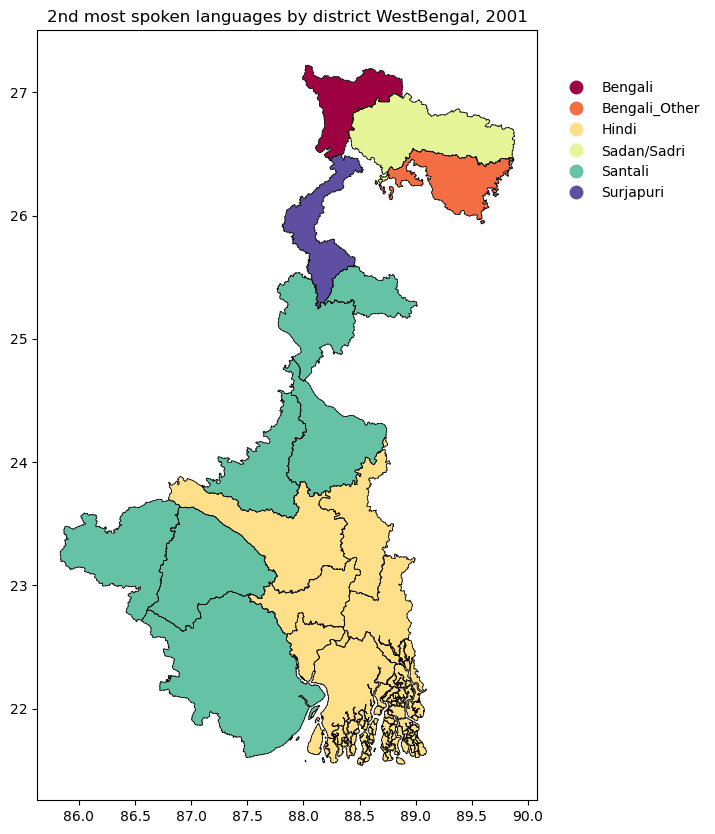

In [86]:
plot_mode_map  (lang_type="LangName", #LangName
                  rank = 2, 
                  State = "WestBengal", 
                  showStates = False,
                  outline = False,
               showLegend = True)

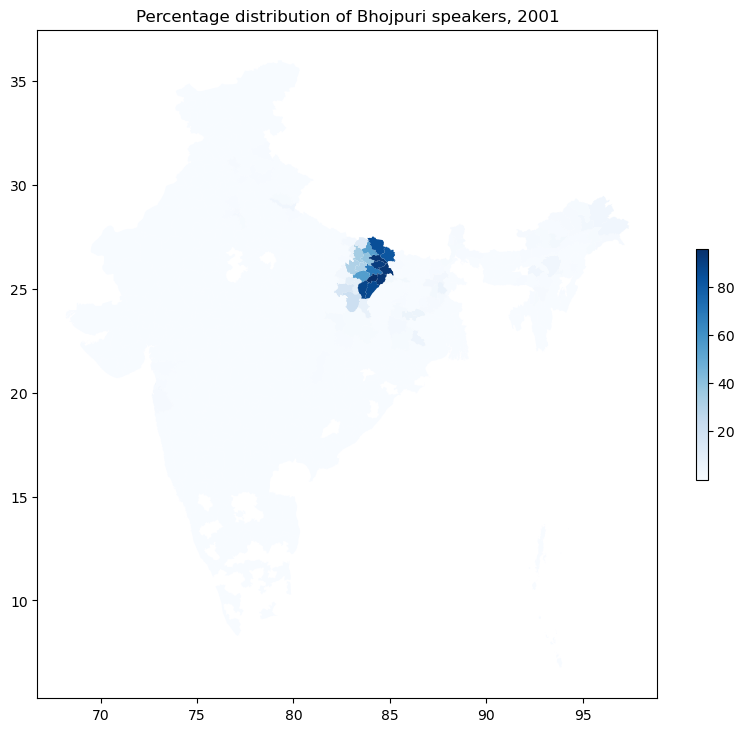

In [64]:
plot_lang_map("Bhojpuri")

C:\Users\Owner\Desktop\Projects\Research\maps\Notebooks\AnalyzeLangs.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dflang.append(pd.DataFrame(toAdd))


<Axes: title={'center': 'Percentage distribution of Urdu speakers, 2001'}>

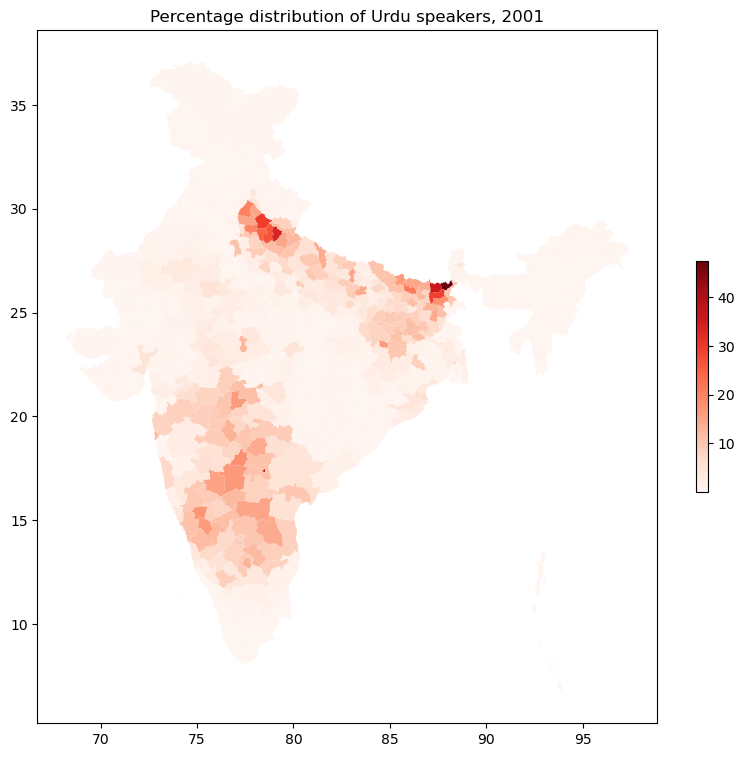

In [42]:
lang_type = "LangName" #"LangGroup"
lang_name = "Urdu" 
df_test = filter_perc_lang(df_01, lang_type, lang_name, "District")
df_test["DISTRICT"] = df_test["DistrictName"]
df_plot = df.merge(df_test, on = "DISTRICT", how = "outer")
#display(df_plot.shape)
#df_test.head()

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Percentage distribution of "+str(lang_name)+" speakers, 2001")
df_plot.plot(column = 'Total_%', ax=ax, cmap = 'Reds',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
#ax.grid(True)

<Axes: title={'center': 'Percentage distribution of Hindi speakers, 2001'}>

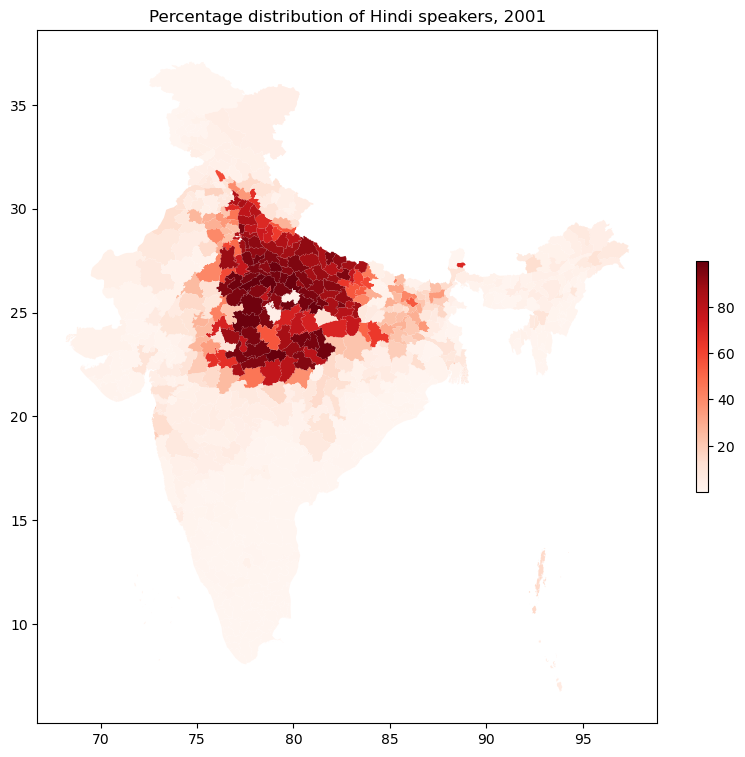

In [34]:
#df = df[~df["ST_NM"].isin(['Andaman & Nicobar Island',       'Lakshadweep'])]
#plt.figure(figsize = [12,12])


In [ ]:
#https://censusindia.gov.in/nada/index.php/catalog/22865/download/25996/PC01_C16_24.xls